<a href="https://colab.research.google.com/github/basawanayya/Own-data-collected-New-House-Construction-Chances-/blob/main/find_new_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopy 
from geopy.geocoders import Nominatim
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io
from folium.plugins import HeatMap
import folium
from folium import plugins


In [2]:
! jupyter trust find_new_home.ipynb

[TrustNotebookApp] ERROR | Notebook missing: find_new_home.ipynb
[TrustNotebookApp] Exiting application: jupyter


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving all collected data.csv to all collected data.csv
User uploaded file "all collected data.csv" with length 6210 bytes


In [4]:
gul= pd.read_csv(io.StringIO(uploaded['all collected data.csv']. decode('utf-8')))

In [5]:
gul.head()

,Area name,latitude,longitude,Number of houses,Total plots,Area density,Average age,Material used,No. of old homes(above>25 years),House Type,Type,Construction chances
0,Kusnoor Road,17.312469,76.866931,7,44,0.159091,about ten,brick,2,normal,New home,high
1,Kusnoor Road,17.307231,76.870097,8,30,0.266667,about twenty,brick,2,normal,New home,high
2,Kusnoor Road,17.311481,76.868011,7,24,0.291667,about ten,brick,0,normal,New home,high
3,Kusnoor Road,17.307210,76.870207,9,30,0.300000,about ten,brick,1,normal,New home,high
4,Tilak Nagar,17.315399,76.862952,3,10,0.300000,about ten,brick,1,normal,New home,high


In [6]:
gul.shape

(63, 12)

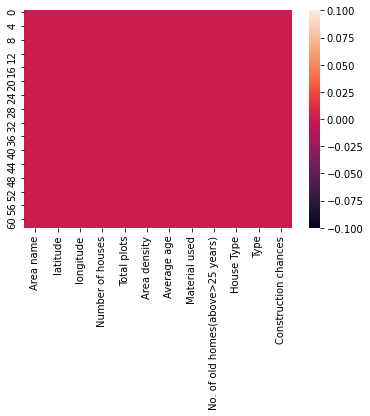

In [7]:
sns.heatmap(gul.isnull())

In [8]:
m = folium.Map([17.339745348675089, 76.83301279909653], zoom_start=11)


In [9]:
for index, row in gul.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=10,
                        popup=row['Area name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [10]:
! jupyter trust find_new_home.ipynb
stationArr = gul[['latitude', 'longitude']].to_numpy()
# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=10))
m


[TrustNotebookApp] ERROR | Notebook missing: find_new_home.ipynb
[TrustNotebookApp] Exiting application: jupyter


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.


In [11]:
high = gul[gul['Construction chances']=='high']
modrate = gul[gul['Construction chances']=='modrate']
low = gul[gul['Construction chances']=='low']

In [12]:
m1 = folium.Map([17.339745348675089, 76.83301279909653], zoom_start=11)
for index, row in high.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=10,
                        popup=row['Area name'],
                        color='green',
                        fill_color="green", 
                       ).add_to(m1)
stationArr = high[['latitude', 'longitude']].to_numpy()
# plot heatmap
m1.add_children(plugins.HeatMap(stationArr, radius=5))
m1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # This is added back by InteractiveShellApp.init_path()


In [13]:
m2 = folium.Map([17.339745348675089, 76.83301279909653], zoom_start=11)
for index, row in modrate.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=10,
                        popup=row['Area name'],
                        color='crimson',
                        fill_color="red", 
                       ).add_to(m2)
stationArr = modrate[['latitude', 'longitude']].to_numpy()
# plot heatmap
m2.add_children(plugins.HeatMap(stationArr, radius=10))
m2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # This is added back by InteractiveShellApp.init_path()


In [14]:
m3 = folium.Map([17.339745348675089, 76.83301279909653], zoom_start=11)
for index, row in low.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=10,
                        popup=row['Area name'],
                        color='grey',
                        fill_color="grey", 
                       ).add_to(m3)
stationArr = low[['latitude', 'longitude']].to_numpy()
# plot heatmap
m3.add_children(plugins.HeatMap(stationArr, radius=10))
m3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # This is added back by InteractiveShellApp.init_path()


In [15]:
gul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Area name                         63 non-null     object 
 1   latitude                          63 non-null     float64
 2   longitude                         63 non-null     float64
 3   Number of houses                  63 non-null     int64  
 4   Total plots                       63 non-null     int64  
 5   Area density                      63 non-null     float64
 6   Average age                       63 non-null     object 
 7   Material used                     63 non-null     object 
 8   No. of old homes(above>25 years)  63 non-null     int64  
 9   House Type                        63 non-null     object 
 10  Type                              63 non-null     object 
 11  Construction chances              63 non-null     object 
dtypes: float64

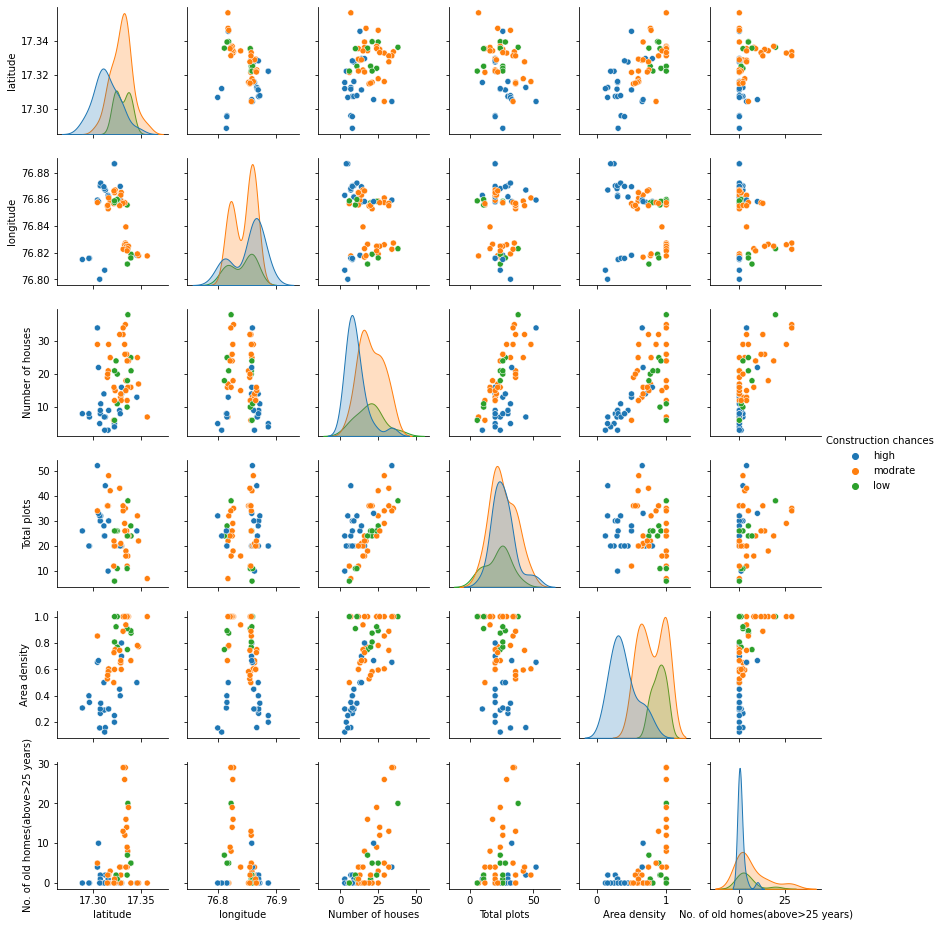

In [16]:

sns.pairplot(gul, hue='Construction chances')
fig=plt.gcf()
fig.set_size_inches(13,13)

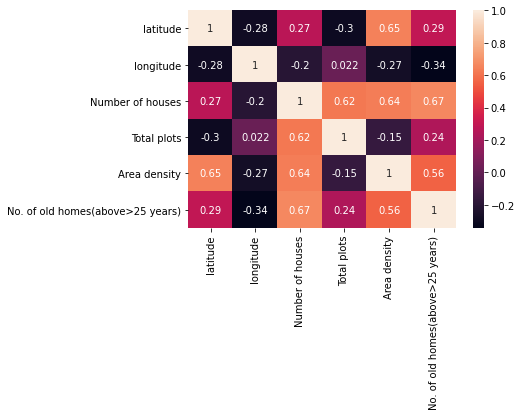

In [17]:
sns.heatmap(gul.corr(), annot=True)

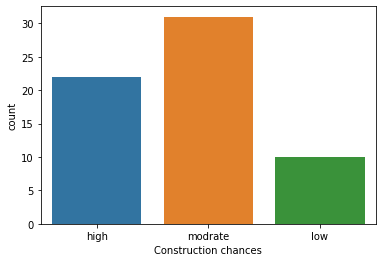

In [18]:
sns.countplot(x='Construction chances', data=gul)
# construction chances are moderate in city compare to other two category

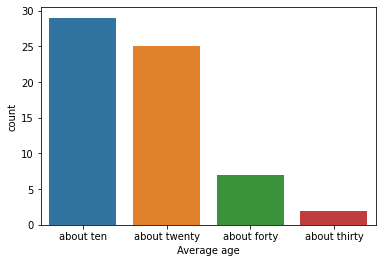

In [19]:
sns.countplot(x='Average age' , data=gul)
# Average age of houses that data collected is about ten and twenty are more compared to forty or thirty
# that's why construction chances are moderate because houses are young.



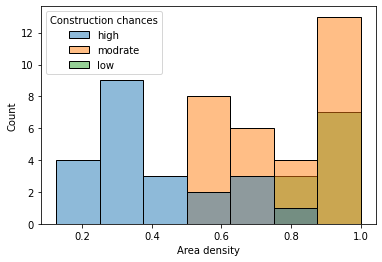

In [20]:
sns.histplot(x='Area density', data=gul, hue='Construction chances')
# the construction chances are more if area density is less clearly, if area density and age is high then also construction chances are high

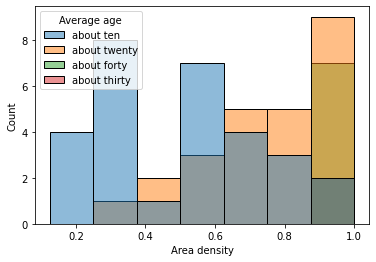

In [21]:
sns.histplot(x='Area density', data=gul, hue='Average age')


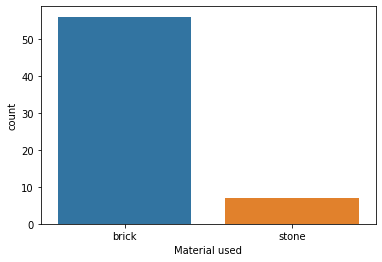

In [22]:
sns.countplot(x='Material used', data=gul)
# modern houses are generally made with bricks, old houses that are 40 years above used stones to construct houses.

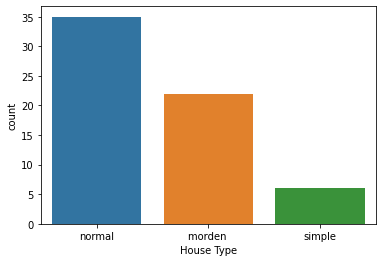

In [23]:
sns.countplot(x='House Type', data=gul)
# here simple means old houses.They are becoming less because of its age.
# modern houses means high standard houses.


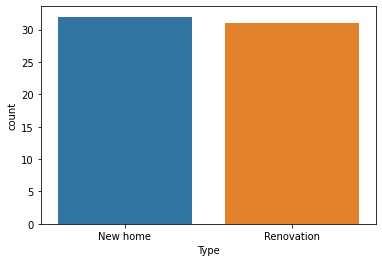

In [24]:
sns.countplot(x='Type', data=gul)
# new home means construction in open plots, Renovation means renovation or complete reconstruction of house
# here we can see both class have equal opportunity

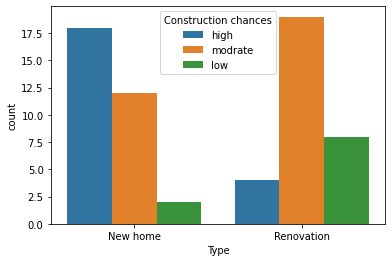

In [25]:
sns.countplot(x='Type', data=gul, hue='Construction chances')
# construction chances are high in open plot construction. While Renovation of houses are moderate 

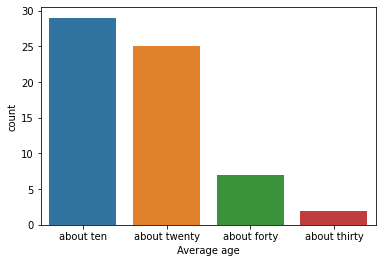

In [26]:
sns.countplot(x='Average age', data=gul)
# average age of houses is a very important feature. it is observed that if age of house made of bricks crosses certain, chances of renovation is high.
# observed value of average is about 30 years. 

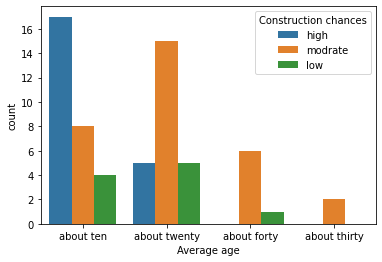

In [27]:
sns.countplot(x='Average age', data=gul,hue='Construction chances')
# if we consider age about 40 and 30, construction chances for 40 is more compared to 30

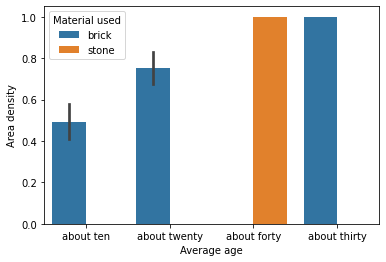

In [28]:
sns.barplot(x='Average age',y='Area density', data=gul,hue='Material used')


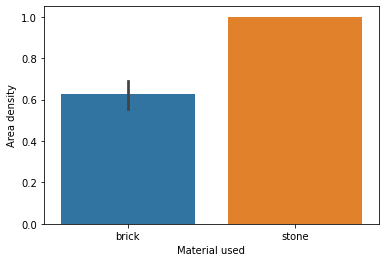

In [29]:
sns.barplot(x='Material used',y='Area density', data=gul)

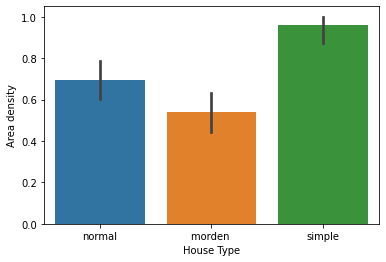

In [30]:
sns.barplot(x='House Type',y='Area density', data=gul)



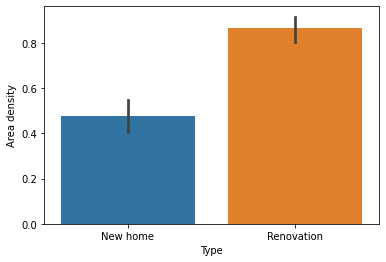

In [31]:
sns.barplot(x='Type',y='Area density', data=gul)
# if area density is high renovation is also high.

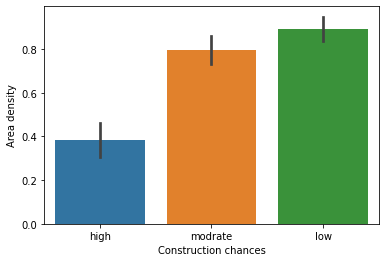

In [32]:
sns.barplot(x='Construction chances',y='Area density', data=gul)
# Higher the area density lower the lower the construction chances.


In [33]:
! jupyter trust find_new_home.ipynb

[TrustNotebookApp] ERROR | Notebook missing: find_new_home.ipynb
[TrustNotebookApp] Exiting application: jupyter
